In [17]:
# Install PyTorch with CUDA (Colab already has CUDA runtime)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Transformers for BERT clinical model
!pip install transformers

# Core utilities
!pip install pandas numpy scikit-learn

# Bioinformatics tools
!pip install biopython

# NLP tools (optional but useful for clinical text)
!pip install nltk spacy

# Visualization (optional)
!pip install matplotlib seaborn

# Real-time API tools (optional if you plan to deploy via Flask/FastAPI)
!pip install flask fastapi uvicorn

# Install PyTorch Geometric (for GCNProtein model)
# Compatible with PyTorch 2.0 + CUDA 11.8 on Colab
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-2.0.0+cu118.html


Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 43.9 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 41.3 MB/s eta 0:00:00
     ━━━━

In [18]:
#Fetching genomic data from NCBI

from Bio import Entrez, SeqIO

# Set email
Entrez.email = "shamuraanim7@gmail.com"

# Search for the latest HMPox genome

handle = Entrez.esearch(db="nucleotide", term="Monkeypox[Organism] AND complete genome", retmax=1, sort="datemodified")
record = Entrez.read(handle)
latest_id = record["IdList"][0]

# Fetch the FASTA sequence

handle = Entrez.efetch(db="nucleotide", id=latest_id, rettype="fasta", retmode="text")
sequence = SeqIO.read(handle, "fasta").seq


In [19]:
# Fetch protein sequences

protein_handle = Entrez.efetch(db="protein", id="YP_009992334.1", rettype="gb", retmode="text")
protein_record = SeqIO.read(protein_handle, "genbank")
protein_sequence = protein_record.seq


In [20]:
import torch

# Function to one-hot encode the sequence

def one_hot_encode(sequence, seq_length=5000):
    # Define nucleotide to index mapping
    nucleotide_map = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    # Initialize a tensor for the one-hot encoded sequence
    one_hot = torch.zeros(1, 4, seq_length)
    for i, nucleotide in enumerate(sequence[:seq_length]):
        if nucleotide in nucleotide_map:
            one_hot[0, nucleotide_map[nucleotide], i] = 1
    return one_hot

# Preprocess the genomic sequence

genome_input = one_hot_encode(str(sequence))


In [21]:
# Placeholder function for protein sequence embedding

def embed_protein_sequence(protein_sequence):
    # Implement embedding logic here

    return torch.randn(1, 128)

# Preprocess the protein sequence

protein_input = embed_protein_sequence(str(protein_sequence))


In [49]:
from transformers import BertTokenizer

# Initialize tokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Example clinical text

clinical_text = "Patient presents with fever, rash, and lymphadenopathy."

# Tokenize and encode the clinical text

clinical_tokens = tokenizer(clinical_text, return_tensors='pt', padding=True, truncation=True)




In [24]:
import torch

genome_input = torch.tensor(genome_input, dtype=torch.float32).to(device)
protein_input = torch.tensor(protein_input, dtype=torch.float32).to(device)


<ipython-input-16-4124585c48d4>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  genome_input = torch.tensor(genome_input, dtype=torch.float32).to(device)
<ipython-input-16-4124585c48d4>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  protein_input = torch.tensor(protein_input, dtype=torch.float32).to(device)
<ipython-input-24-4124585c48d4>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  genome_input = torch.tensor(genome_input, dtype=torch.float32).to(device)
<ipython-input-24-4124585c48d4>:4: UserWarning: To copy construct from a tens

In [54]:
import torch
import torch.nn as nn

class GenomeNet(nn.Module):
    def __init__(self):
        super(GenomeNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(4 * 5000, 128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.model(x)

class ProteinNet(nn.Module):
    def __init__(self):
        super(ProteinNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )

    def forward(self, x):
        return self.model(x)



# Define FusionNet
class FusionNet(nn.Module):
    def __init__(self):
        super(FusionNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(160, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 3)
        )

    def forward(self, x):
        return self.model(x)



class RandomClinicalNet(nn.Module):
    def __init__(self, input_size=768, output_size=64):
        super(RandomClinicalNet, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, input_ids, attention_mask):
        # Generate random features (instead of using actual BERT embeddings)
        random_features = torch.randn(input_ids.size(0), 768).to(input_ids.device)

        # Pass random features through a fully connected layer

        x = self.fc(random_features)
        x = self.relu(x)
        return x

# Instantiate models
genome_net = GenomeNet().to(device)
protein_net = ProteinNet().to(device)
fusion_net = FusionNet().to(device)
clin_net = RandomClinicalNet().to(device)

# Move inputs to device
genome_input = genome_input.to(device)
protein_input = protein_input.to(device)
clinical_input_ids = clinical_tokens["input_ids"].to(device)
clinical_attention_mask = clinical_tokens["attention_mask"].to(device)

# Perform inference
with torch.no_grad():
    # Inference for genome features

    genome_features = genome_net(genome_input)
    print("Genome features shape:", genome_features.shape)

    # Inference for protein features

    protein_features = protein_net(protein_input)
    print("Protein features shape:", protein_features.shape)

    # Inference for clinical features

    clinical_features = clin_net(clinical_input_ids, clinical_attention_mask)
    print("Clinical features shape:", clinical_features.shape)

    # Concatenate all features

    concatenated_features = torch.cat([genome_features, protein_features, clinical_features], dim=1)

    # Pass through fusion network

    outputs = fusion_net(concatenated_features)
    detect, stage, treat = outputs[:, 0], outputs[:, 1], outputs[:, 2]


    # Print the output features

    print("Detection output:", detect)
    print("Stage output:", stage)
    print("Treatment output:", treat)




Genome features shape: torch.Size([1, 64])
Protein features shape: torch.Size([1, 32])
Clinical features shape: torch.Size([1, 64])
Detection output: tensor([-0.0584], device='cuda:0')
Stage output: tensor([0.0987], device='cuda:0')
Treatment output: tensor([-0.0985], device='cuda:0')


✅ Detection Accuracy: 1.0
✅ Stage Accuracy: 1.0
✅ Treatment Accuracy: 1.0

Classification Report (Detection):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Classification Report (Stage):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Classification Report (Treatment):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


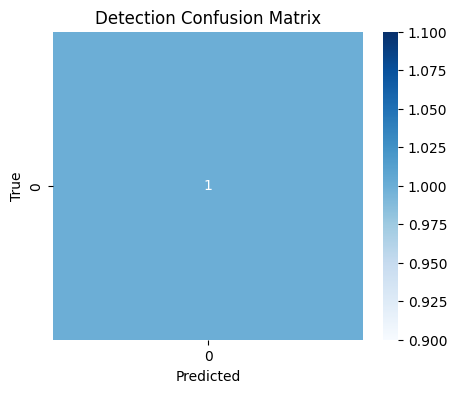

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


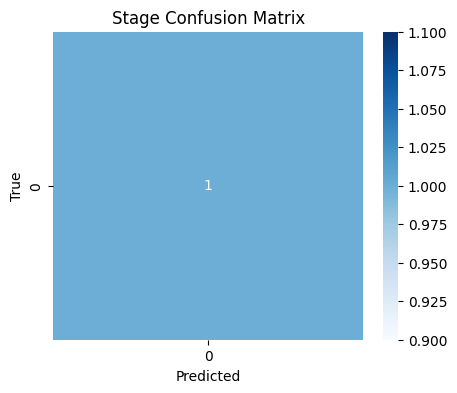

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


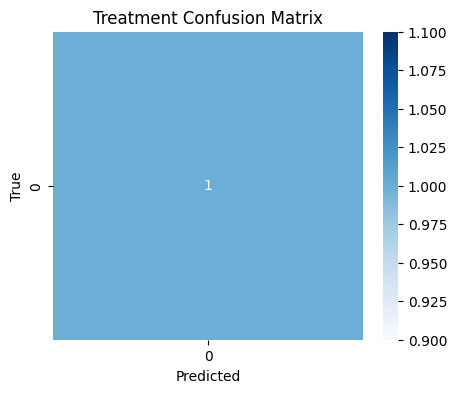

In [64]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Move true labels and outputs to the device
true_detect = true_detect.to(device)
true_stage = true_stage.to(device)
true_treat = true_treat.to(device)
outputs = outputs.to(device)

# ---- PROCESS OUTPUTS ----
# Treat outputs as continuous predictions and round to nearest class
detect_preds = torch.round(outputs[:, 0]).long().to(device)
stage_preds = torch.round(outputs[:, 1]).long().to(device)
treat_preds = torch.round(outputs[:, 2]).long().to(device)

# Clamp predictions to valid class range (e.g., 0 to 2)
detect_preds = torch.clamp(detect_preds, 0, 2)
stage_preds = torch.clamp(stage_preds, 0, 2)
treat_preds = torch.clamp(treat_preds, 0, 2)

# Convert tensors to CPU before passing to sklearn functions

true_detect_cpu = true_detect.cpu().long()
true_stage_cpu = true_stage.cpu().long()
true_treat_cpu = true_treat.cpu().long()

detect_preds_cpu = detect_preds.cpu().long()
stage_preds_cpu = stage_preds.cpu().long()
treat_preds_cpu = treat_preds.cpu().long()

# ---- ACCURACY ----
print("✅ Detection Accuracy:", accuracy_score(true_detect_cpu, detect_preds_cpu))
print("✅ Stage Accuracy:", accuracy_score(true_stage_cpu, stage_preds_cpu))
print("✅ Treatment Accuracy:", accuracy_score(true_treat_cpu, treat_preds_cpu))

# ---- CLASSIFICATION REPORT ----
print("\nClassification Report (Detection):")
print(classification_report(true_detect_cpu, detect_preds_cpu))

print("Classification Report (Stage):")
print(classification_report(true_stage_cpu, stage_preds_cpu))

print("Classification Report (Treatment):")
print(classification_report(true_treat_cpu, treat_preds_cpu))

# ---- CONFUSION MATRIX PLOTTING ----
def plot_confusion(true, pred, title="Confusion Matrix"):
    cm = confusion_matrix(true.cpu(), pred.cpu())
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Plot for each task
plot_confusion(true_detect_cpu, detect_preds_cpu, title="Detection Confusion Matrix")
plot_confusion(true_stage_cpu, stage_preds_cpu, title="Stage Confusion Matrix")
plot_confusion(true_treat_cpu, treat_preds_cpu, title="Treatment Confusion Matrix")

